In [5]:
import numpy as np
import matplotlib.pyplot as plt




In [15]:
class TubeMaskingGenerator:
    def __init__(self, input_size, mask_ratio):
        self.frames, self.num_patches_per_frame = input_size
        self.total_patches = self.frames * self.num_patches_per_frame 
        self.num_masks_per_frame = int(mask_ratio * self.num_patches_per_frame)
        self.total_masks = self.frames * self.num_masks_per_frame

    def __repr__(self):
        repr_str = "Masks: total patches {}, mask patches {}".format(
            self.total_patches, self.total_masks
        )
        return repr_str

    def __call__(self):
        mask_per_frame = np.hstack([
            np.zeros(self.num_patches_per_frame - self.num_masks_per_frame),
            np.ones(self.num_masks_per_frame),
        ])
        mask = np.tile(mask_per_frame, (self.frames, 1)).flatten()
        return mask 

# Load your data
data = np.load("../data/hcp/raw/100206_0.npy")

# Define input size and masking ratio
input_size = (1200, 360)  # (time points, brain regions)
mask_ratio = 0.50

# Create a TubeMaskingGenerator instance
masking_generator = TubeMaskingGenerator(input_size, mask_ratio)

# Generate the tube mask
tube_mask = masking_generator()
shuffled = np.random.permutation(tube_mask.reshape(data.T.shape).T)

# Apply the tube mask to the data
masked_data = data * shuffled
masked_data = masked_data

In [9]:
masked_data.shape

(360, 1200)

In [78]:
masked_data.nonzero()[0].size/1200

180.0

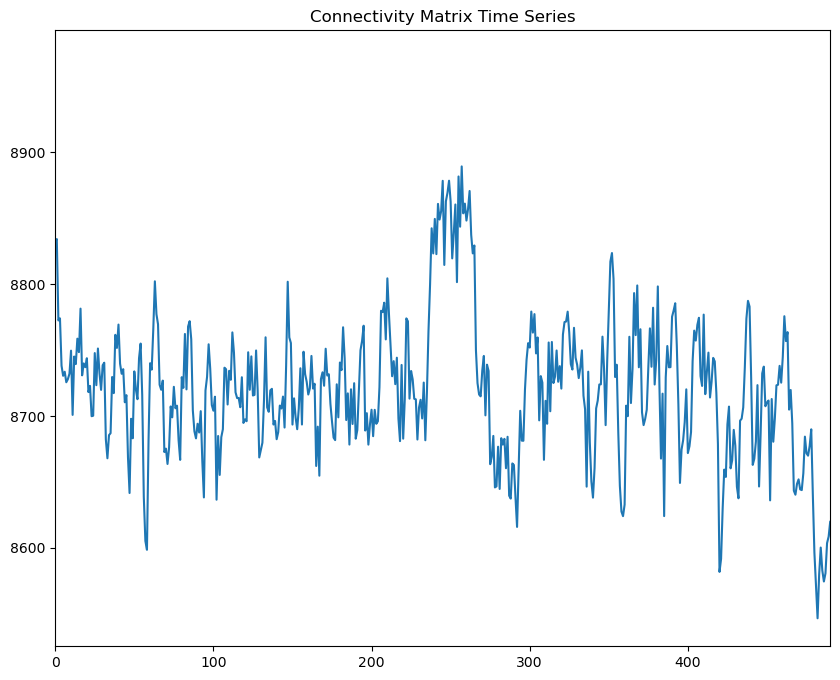

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(masked_data[10])
plt.xlim(0, 490)
plt.title('Connectivity Matrix Time Series')
plt.show()